<a href="https://colab.research.google.com/github/Chitra-2024/Chitra_GDG_Tasks/blob/Task1/Copy_of_GDG_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GDG TASK 1**


Welcome to GDG!

Your first task in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [1]:
!pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.9 MB/s eta 0:00:00


Mount your Google Drive onto this notebook.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import basic libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/file/d/1gHWh61kHVT-tiJxw8DWzNH9UHhCjR95f/view?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Task1.csv')

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [5]:
data.iloc[[0,1,2,3,4]]

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [6]:
print(data.columns)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')


You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [7]:
data=data.drop(['id'],axis=1)

Display the the number of rows and columns in this dataset.

In [8]:
print(len(data.axes[0]))
print(len(data.axes[1]))

74051
9


Use the info() function to get, well, info about it.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [10]:
data.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

Write a function to print all the unique values in the columns of Sex and Age.

In [11]:
data.Sex.unique()
data.Age.unique()

array([ 9,  8, 11, 10, 12,  7,  5, 14,  6, 13, 16,  4, 18, 15, 17,  3, 19,
       23, 21, 20, 26, 22, 27, 24, 25, 29,  2,  1])

List out the number of crabs belonging to each gender.

In [12]:
print(data['Sex'].value_counts()['M'])
print(data['Sex'].value_counts()['F'])
print(data['Sex'].value_counts()['I'])

27084
23010
23957


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [13]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import IPython
IPython.display.HTML(filename='output.html')

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [15]:
data=data.drop(data[data['Height']==0].index)

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [16]:
print(len(data.axes[0]))
print(len(data.axes[1]))

74027
9


#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [20]:
#first we group the age data by sex, then we take mean of the grouped age data

In [21]:
#then we plot a bar graph giving labels for each axis and the total graph. Finally we display.

x axis will contain Sex, and y axis has the average age.

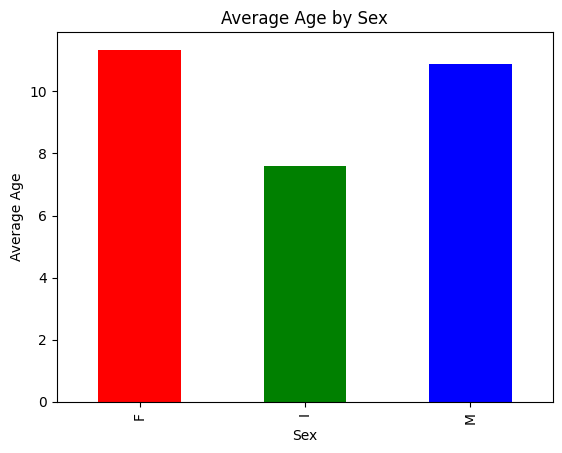

In [18]:
average_age = data.groupby('Sex')['Age'].mean()
average_age.plot(kind='bar', color=['red', 'green','blue'])
plt.title('Average Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



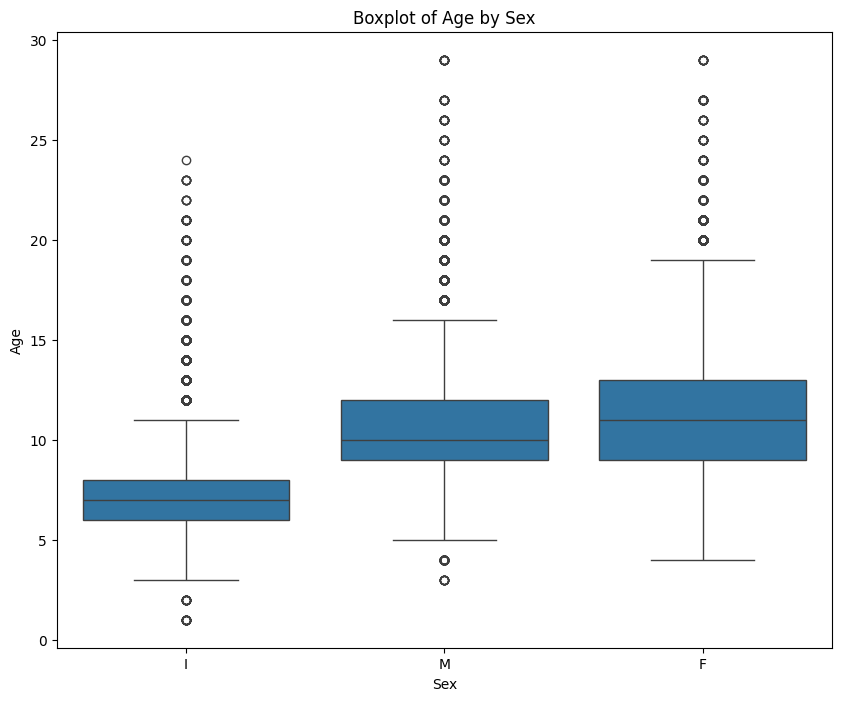

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sex', y='Age', data=data)
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

<Axes: xlabel='Age', ylabel='Density'>

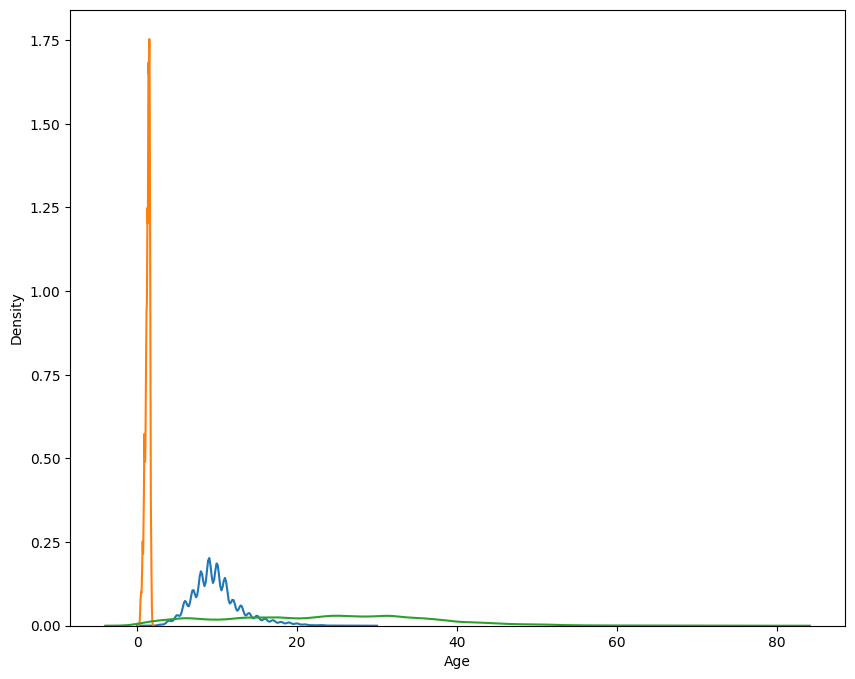

In [28]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data['Age'], label='Age')
sns.kdeplot(data['Length'], label='Length')
sns.kdeplot(data['Weight'], label='Weight')

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

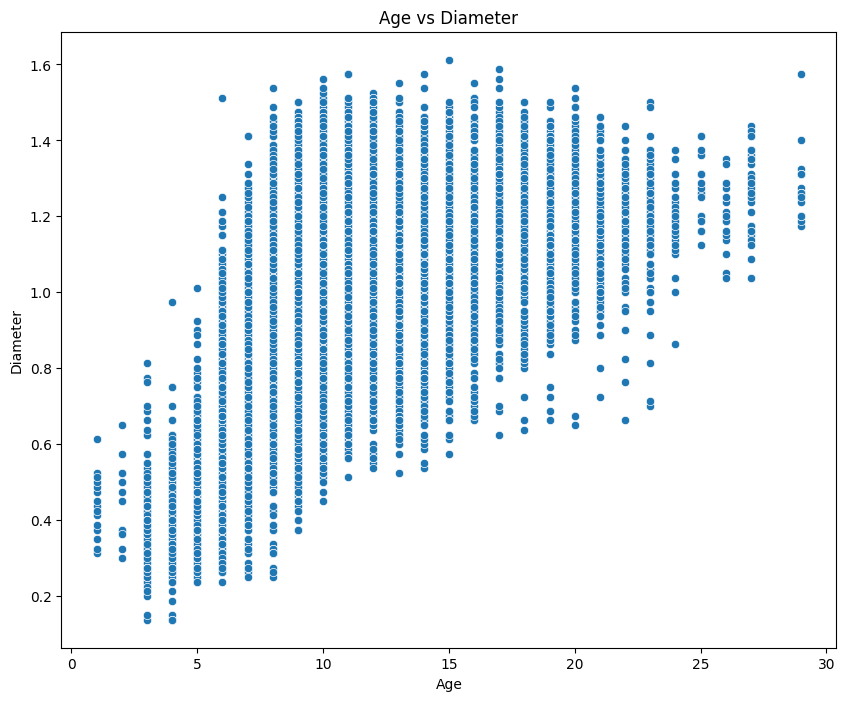

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Diameter', data=data)
plt.title('Age vs Diameter')
plt.xlabel('Age')
plt.ylabel('Diameter')
plt.show()

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [69]:
data.corr()

Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.989418  0.918402  0.936407        0.915529   
Diameter        0.989418  1.000000  0.921415  0.938273        0.914199   
Height          0.918402  0.921415  1.000000  0.902231        0.864457   
Weight          0.936407  0.938273  0.902231  1.000000        0.971242   
Shucked Weight  0.915529  0.914199  0.864457  0.971242        1.000000   
Viscera Weight  0.917872  0.918357  0.883557  0.971037        0.942576   
Shell Weight    0.916954  0.922683  0.903847  0.965493        0.910317   
Lost Weight     0.177724  0.178908  0.164377  0.188473        0.125969   
Age             0.612374  0.620800  0.637759  0.600839        0.502877   
Sex_F           0.344691  0.348872  0.341530  0.345680        0.320783   
Sex_I          -0.651241 -0.657081 -0.636217 -0.641164       -0.611179   
Sex_M           0.301189  0.302842  0.289637  0.290453        0.285259   

                Viscera Weight  Shell Weight  Lost Weight       Age     Sex_F  \
Length                0.917872      0.916954     0.177724  0.612374  0.344691   
Diameter              0.918357      0.922683     0.178908  0.620800  0.348872   
Height                0.883557      0.903847     0.164377  0.637759  0.341530   
Weight                0.971037      0.965493     0.188473  0.600839  0.345680   
Shucked Weight        0.942576      0.910317     0.125969  0.502877  0.320783   
Viscera Weight        1.000000      0.933860     0.138183  0.576436  0.345628   
Shell Weight          0.933860      1.000000     0.143850  0.663173  0.348475   
Lost Weight           0.138183      0.143850     1.000000  0.147467  0.070687   
Age                   0.576436      0.663173     0.147467  1.000000  0.290292   
Sex_F                 0.345628      0.348475     0.070687  0.290292  1.000000   
Sex_I                -0.635866     -0.637644    -0.137078 -0.515545 -0.464202   
Sex_M                 0.285359      0.284350     0.065190  0.221690 -0.510119   

                   Sex_I     Sex_M  
Length         -0.651241  0.301189  
Diameter       -0.657081  0.302842  
Height         -0.636217  0.289637  
Weight         -0.641164  0.290453  
Shucked Weight -0.611179  0.285259  
Viscera Weight -0.635866  0.285359  
Shell Weight   -0.637644  0.284350  
Lost Weight    -0.137078  0.065190  
Age            -0.515545  0.221690  
Sex_F          -0.464202 -0.510119  
Sex_I           1.000000 -0.525021  
Sex_M          -0.525021  1.000000

If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [32]:
data['Lost Weight'] = data['Weight'] - (data['Shucked Weight'] + data['Viscera Weight'] + data['Shell Weight'])
data=data[['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age']]
data.loc[data['Lost Weight'] <= 0, 'Lost Weight'] = 0
data.loc[data['Lost Weight'] > 0, 'Lost Weight'] = 1


To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

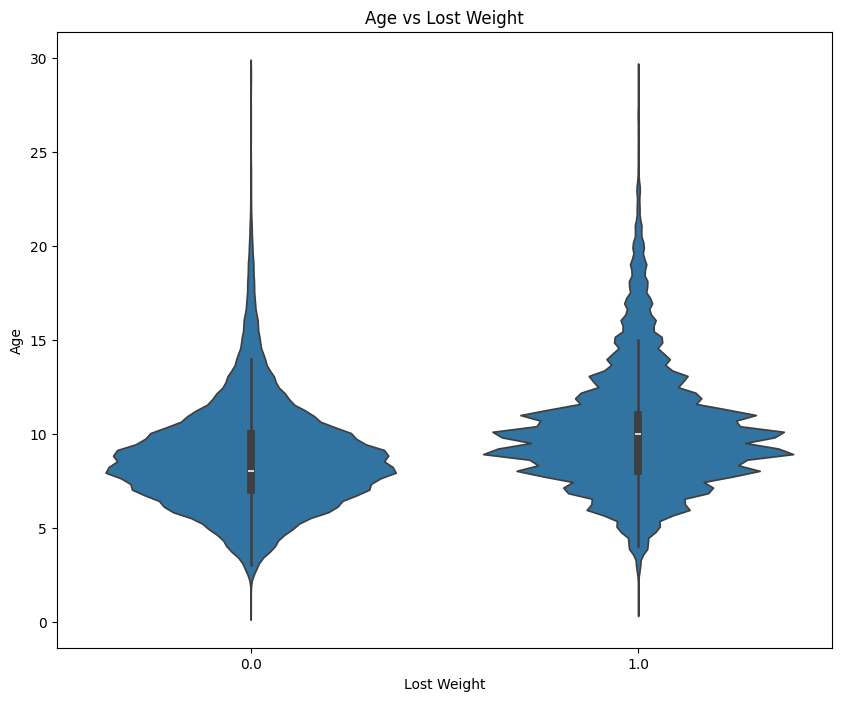

In [33]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Lost Weight', y='Age', data=data)
plt.title('Age vs Lost Weight')
plt.xlabel('Lost Weight')
plt.ylabel('Age')
plt.show()

#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

AttributeError: QuadMesh.set() got an unexpected keyword argument 'x'

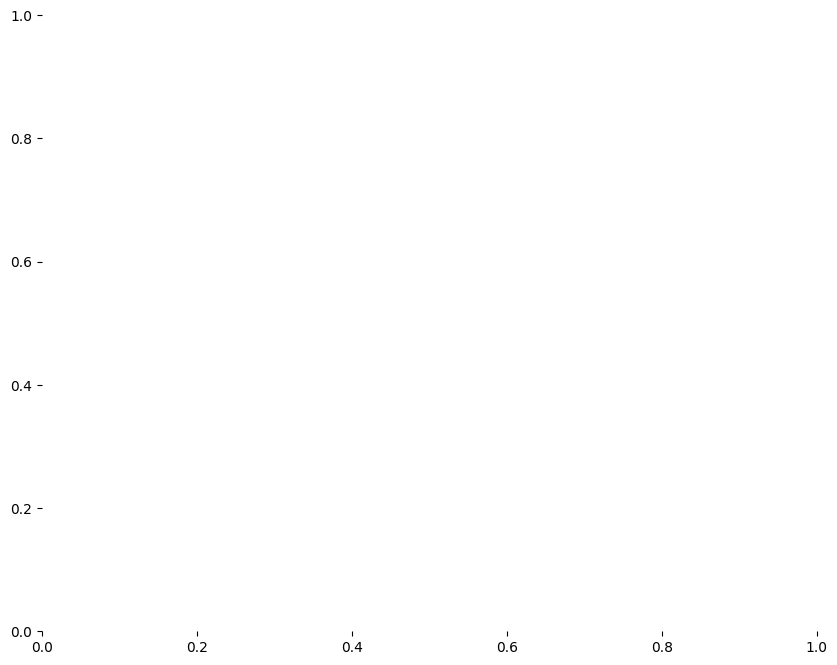

insight yaha likho

#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [41]:
data = pd.get_dummies(data, columns=['Sex'])

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [61]:
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)
data_norm = (data - data.min()) / (data.max() - data.min())

For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [63]:
df_std = pd.read_csv("/content/drive/MyDrive/Task1.csv")

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

Standardise df_std such that the one hot label encoded columns aren't affected.

In [67]:
from sklearn.preprocessing import StandardScaler
one_hot_columns = ['sex_male', 'sex_female']
columns_to_standardize = data.columns.difference(one_hot_columns)
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

research goes here